In [1]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


In [2]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [6]:
## TODO: Specify a CNN architecture

def create_model():
    model_3 = Sequential()
    model_3.add(Convolution2D(16, (3,3), strides=(1, 1), padding='same', activation='relu', input_shape = X_train.shape[1:]))
    model_3.add(BatchNormalization())
    model_3.add(MaxPooling2D())
    model_3.add(Convolution2D(32, (3,3), strides=(1, 1), padding='same', activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(MaxPooling2D())
    model_3.add(Convolution2D(64, (3,3), strides=(1, 1), padding='same', activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(MaxPooling2D())
    model_3.add(Convolution2D(128, (3,3), strides=(1, 1), padding='same', activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(MaxPooling2D())
    model_3.add(Flatten())
    model_3.add(Dense(256, activation='relu'))
    model_3.add(BatchNormalization())
    model_3.add(Dense(y_train.shape[1], ))
    return model_3


In [7]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint
## TODO: Compile the model

optimizers = {'SGD':SGD(), 
              'RMSprop':RMSprop(), 
              'Adagrad':Adagrad(), 
              'Adadelta':Adadelta, 
              'Adam':Adam, 
              'Adamax':Adamax, 
              'Nadam':Nadam,
             }

batch_size = 32
epochs = 80
hist = {}
for optimizer in optimizers.keys():
    model_3 = create_model()
    print("Training model using "+ optimizer)
    model_3.compile(optimizer, 'mean_squared_error', metrics = ['mse'])
    filepath = "saved_models/optimizer_selection/model_3_" + optimizer +".h5"
    checkpointer = ModelCheckpoint(filepath = filepath, verbose = 1, save_best_only = True)
    hist[optimizer] = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Training model using Adamax
Train on 1712 samples, validate on 428 samples
Epoch 1/80
1712/1712 [==============================] - 4s - loss: 0.3148 - mean_squared_error: 0.3148 - val_loss: 0.9378 - val_mean_squared_error: 0.9378
Epoch 2/80
1712/1712 [==============================] - 3s - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 3.7511 - val_mean_squared_error: 3.7511
Epoch 3/80
1712/1712 [==============================] - 3s - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 6.8142 - val_mean_squared_error: 6.8142
Epoch 4/80
1712/1712 [==============================] - 3s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 8.0905 - val_mean_squared_error: 8.0905
Epoch 5/80
1712/1712 [==============================] - 3s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 4.8323 - val_mean_squared_error: 4.8323
Epoch 6/80
1712/1712 [==============================] - 3s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 3.6080 - val_mean_squared_error: 3.

1712/1712 [==============================] - 3s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 50/80
1712/1712 [==============================] - 3s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 51/80
1712/1712 [==============================] - 3s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 52/80
1712/1712 [==============================] - 3s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 53/80
1712/1712 [==============================] - 3s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 54/80
1712/1712 [==============================] - 3s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 55/80
1712/1712 [==============================] - 3s - loss: 0.0017 -

1712/1712 [==============================] - 4s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 21/80
1712/1712 [==============================] - 3s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 22/80
1712/1712 [==============================] - 4s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 23/80
1712/1712 [==============================] - 3s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 24/80
1712/1712 [==============================] - 3s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 25/80
1712/1712 [==============================] - 3s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 26/80
1712/1712 [==============================] - 3s - loss: 0.0054 -

1712/1712 [==============================] - 3s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 76/80
1712/1712 [==============================] - 3s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 77/80
1712/1712 [==============================] - 4s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 78/80
1712/1712 [==============================] - 3s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 79/80
1712/1712 [==============================] - 3s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 80/80
1712/1712 [==============================] - 4s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Training model using Adagrad
Train on 1712 samples, validate on 428 samples


1712/1712 [==============================] - 3s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 22/80
1712/1712 [==============================] - 3s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 23/80
1712/1712 [==============================] - 3s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 24/80
1712/1712 [==============================] - 3s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 25/80
1712/1712 [==============================] - 3s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 26/80
1712/1712 [==============================] - 3s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 27/80
1712/1712 [==============================] - 3s - loss: 0.0022 -

1712/1712 [==============================] - 3s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 76/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 77/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 78/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 79/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 80/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Training model using SGD
Train on 1712 samples, validate on 428 samples
Epoc

1712/1712 [==============================] - 3s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 44/80
1712/1712 [==============================] - 3s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 45/80
1712/1712 [==============================] - 3s - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 46/80
1712/1712 [==============================] - 3s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 47/80
1712/1712 [==============================] - 3s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 48/80
1712/1712 [==============================] - 3s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 49/80
1712/1712 [==============================] - 3s - loss: 0.0117 -

1712/1712 [==============================] - 4s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 12/80
1712/1712 [==============================] - 4s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 13/80
1712/1712 [==============================] - 4s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 14/80
1712/1712 [==============================] - 4s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 15/80
1712/1712 [==============================] - 4s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 16/80
1712/1712 [==============================] - 3s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 17/80
1712/1712 [==============================] - 4s - loss: 0.0043 -

1712/1712 [==============================] - 3s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 67/80
1712/1712 [==============================] - 3s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 68/80
1712/1712 [==============================] - 3s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 69/80
1712/1712 [==============================] - 3s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 70/80
1712/1712 [==============================] - 3s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 71/80
1712/1712 [==============================] - 3s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 72/80
1712/1712 [==============================] - 3s - loss: 0.0038 -

1712/1712 [==============================] - 3s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 40/80
1712/1712 [==============================] - 3s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 41/80
1712/1712 [==============================] - 3s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 42/80
1712/1712 [==============================] - 3s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 43/80
1712/1712 [==============================] - 3s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 44/80
1712/1712 [==============================] - 3s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 45/80
1712/1712 [==============================] - 3s - loss: 0.0069 -

1712/1712 [==============================] - 3s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 7.4883 - val_mean_squared_error: 7.4883
Epoch 7/80
1712/1712 [==============================] - 3s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 11.8347 - val_mean_squared_error: 11.8347
Epoch 8/80
1712/1712 [==============================] - 3s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 2.5807 - val_mean_squared_error: 2.5807
Epoch 9/80
1712/1712 [==============================] - 3s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 1.5424 - val_mean_squared_error: 1.5424
Epoch 10/80
1712/1712 [==============================] - 3s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 11/80
1712/1712 [==============================] - 3s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 12/80
1712/1712 [==============================] - 3s - loss: 0.0032 - 

1712/1712 [==============================] - 3s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 22/80
1712/1712 [==============================] - 3s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 23/80
1712/1712 [==============================] - 3s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 24/80
1712/1712 [==============================] - 3s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 25/80
1712/1712 [==============================] - 3s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 26/80
1712/1712 [==============================] - 3s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 27/80
1712/1712 [==============================] - 3s - loss: 0.0020 -

1712/1712 [==============================] - 3s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 57/80
1712/1712 [==============================] - 3s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 58/80
1712/1712 [==============================] - 3s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 59/80
1712/1712 [==============================] - 3s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 60/80
1712/1712 [==============================] - 3s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 61/80
1712/1712 [==============================] - 3s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 62/80
1712/1712 [==============================] - 3s - loss: 0.0014 -

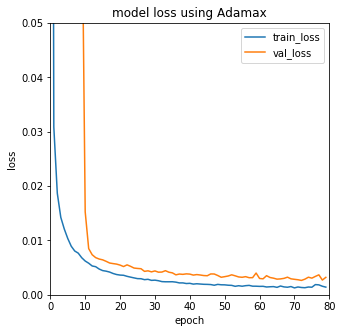

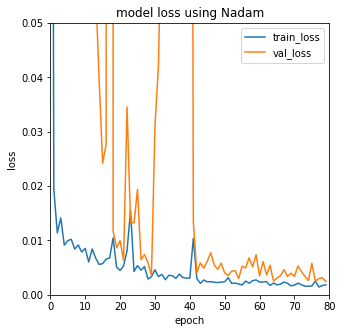

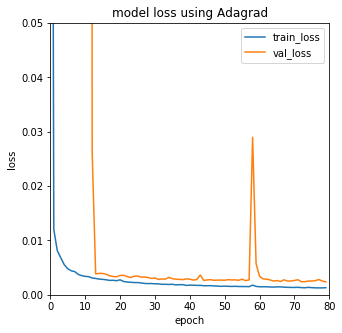

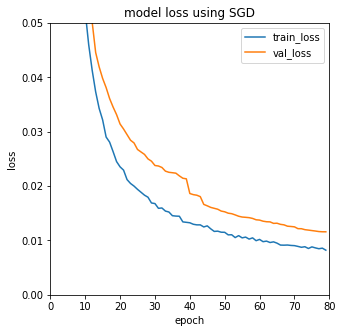

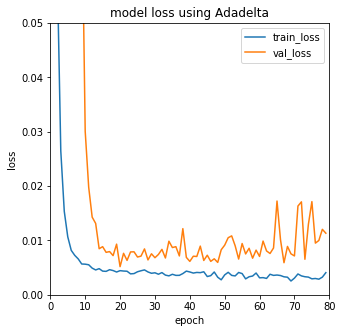

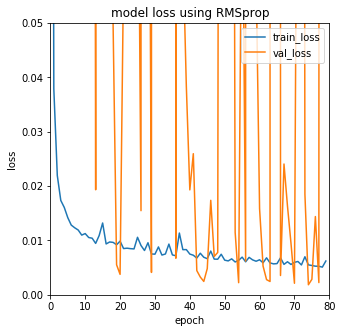

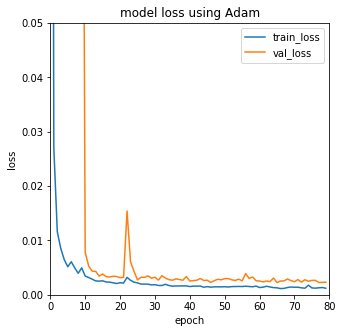

In [13]:
import matplotlib.pyplot as plt

for optimizer in optimizers.keys():
    train_loss = hist[optimizer].history['loss']
    val_loss = hist[optimizer].history['val_loss']
    model_loss_fig = plt.figure(figsize = (5,5))
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model loss using ' + optimizer)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.xlim([0,80])
    plt.ylim([0,0.05])
    plt.legend(['train_loss', 'val_loss'], loc='upper right')
    plt.show()

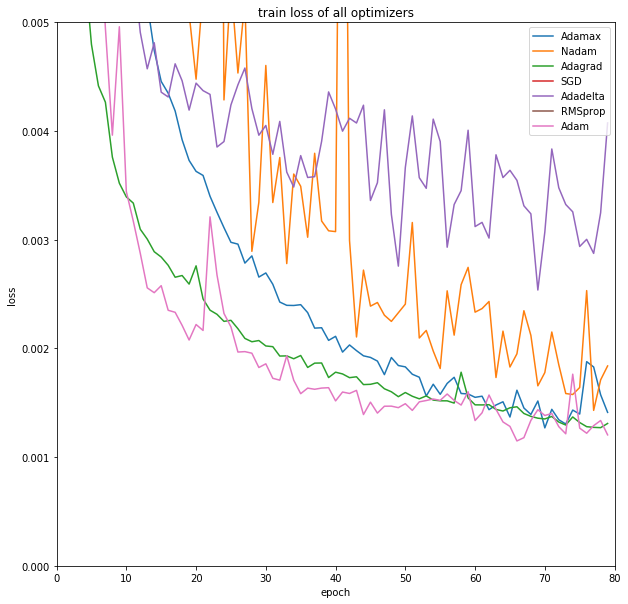

In [15]:
optimizer_names = []
model_loss_fig = plt.figure(figsize = (10,10))
for optimizer in optimizers.keys():
    plt.plot(hist[optimizer].history['loss'])
    optimizer_names.append(optimizer)

plt.title('train loss of all optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,80])
plt.ylim([0,0.005])
plt.legend(optimizer_names, loc='upper right')
plt.show()

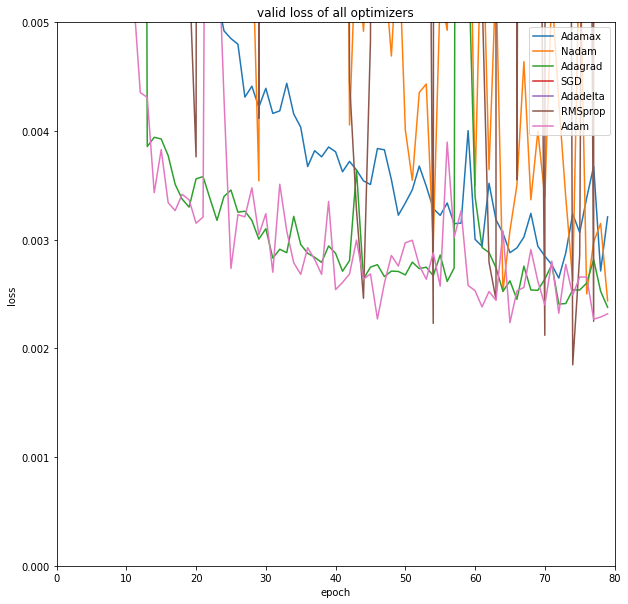

In [18]:
optimizer_names = []
model_loss_fig = plt.figure(figsize = (10,10))
for optimizer in optimizers.keys():
    plt.plot(hist[optimizer].history['val_loss'])
    optimizer_names.append(optimizer)

plt.title('valid loss of all optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,80])
plt.ylim([0,0.005])
plt.legend(optimizer_names, loc='upper right')
plt.show()